In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
from hot_sauce.config import Peppers
from hot_sauce.hot_sauce import (
    HotSauceData,
    sample_peppers,
    compute_color,
    enum_to_data_frame,
    compute_peppers_factor)

In [3]:
p = list(p for p in Peppers)[0]

In [4]:
p.name

'BANANA'

In [5]:
hsd = HotSauceData().sample(1000)

Text(0,0.5,'Spicyness')

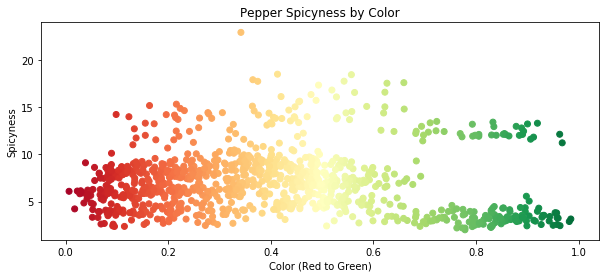

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(hsd.COLOR, hsd.SPICYNESS, color=cm.RdYlGn(hsd.COLOR))
ax.set_title("Pepper Spicyness by Color")
ax.set_xlabel("Color (Red to Green)")
ax.set_ylabel("Spicyness")

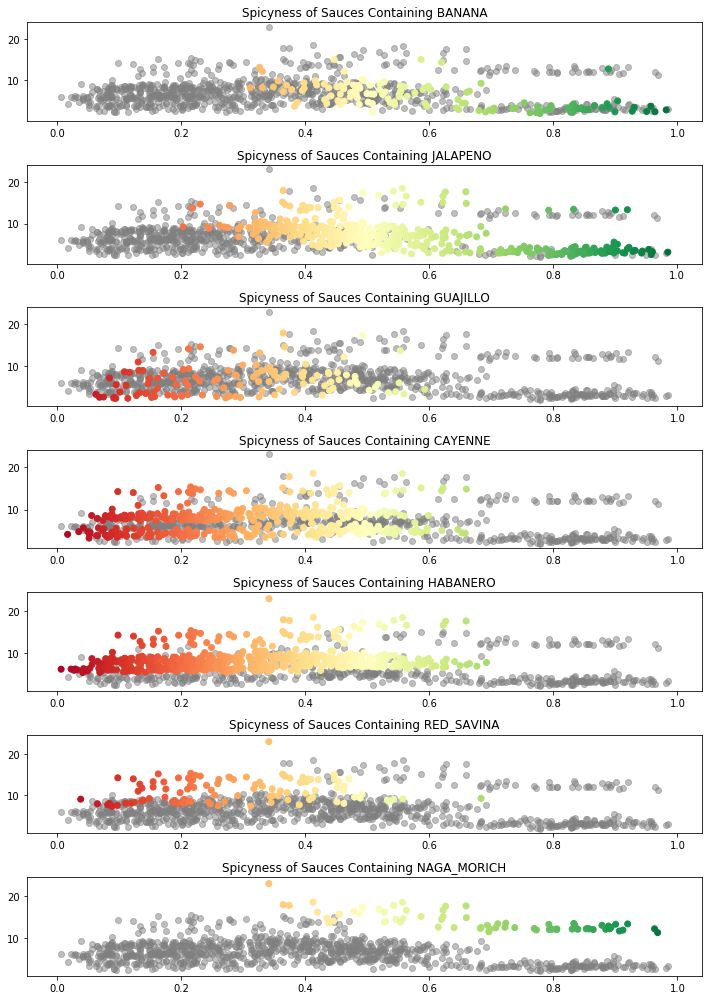

In [25]:
fig, axs = plt.subplots(len(Peppers), 1, figsize=(10, 14))

for p, ax in zip(Peppers, axs):
    name = p.name
    df_p_in_sauce = hsd[hsd[name]]
    df_p_not_in_sauce = hsd[~hsd[name]]
    ax.scatter(
        df_p_not_in_sauce.COLOR, df_p_not_in_sauce.SPICYNESS, 
        color="grey", alpha=0.5)
    ax.scatter(
        df_p_in_sauce.COLOR, df_p_in_sauce.SPICYNESS, 
        color=cm.RdYlGn(df_p_in_sauce.COLOR))
    ax.set_title(f"Spicyness of Sauces Containing {name}")

fig.tight_layout()

In [7]:
peppers = sample_peppers(300)
peppers_df = enum_to_data_frame(Peppers, peppers)

In [8]:
compute_peppers_factor(peppers_df)

array([ 5.5,  5. ,  8. ,  7. ,  5.5,  4.5,  4. ,  2. , 16. ,  4. ,  4. ,
       11. ,  7. ,  6. ,  7. ,  5. ,  4. ,  4. ,  4. , 10. ,  6. ,  6. ,
        5.5,  7. ,  4.5,  5. ,  6.5,  1. ,  7. ,  2. ,  6. ,  4. ,  1. ,
        7. ,  2.5,  1. ,  3. ,  1. ,  6. ,  6. ,  1. ,  3. ,  0.5,  5. ,
        2. , 14.5,  6. ,  3.5,  6. , 10. ,  2. ,  2. ,  7. ,  4. ,  7. ,
        5. , 14. ,  8. ,  6.5,  4. ,  2. ,  1. , 18. , 12. , 16. ,  1. ,
        4. ,  7. ,  9. ,  6. ,  5. ,  1. ,  1. ,  2. ,  4. ,  0.5,  4. ,
        7. ,  1. , 12. ,  3. ,  7. ,  4. ,  5. ,  1. ,  2. , 14. ,  7. ,
        6. ,  1. ,  1. ,  7. ,  3. ,  5. ,  5. ,  4. , 13. , 10. ,  8. ,
        1. ,  4. ,  4. ,  6. ,  7. ,  4.5,  4. ,  0.5,  2. ,  2. ,  4. ,
        4. ,  2. ,  4. , 14. ,  4. ,  5. , 10. ,  1. ,  1. ,  4.5,  4. ,
        6. ,  3. ,  3. ,  7. ,  6. ,  2. ,  3. ,  3. ,  5. , 11. ,  4. ,
        5. ,  1. ,  7. ,  6. , 12. ,  5. ,  5. ,  5. ,  7. ,  4. ,  2. ,
        1. ,  4. ,  7. ,  0.5,  7. ,  4. ,  3. ,  7

In [9]:
color = compute_color(peppers)

In [10]:
def hist_set_colormap(bins, patches, colormap):
    # Source: https://stackoverflow.com/questions/23061657
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', colormap(c))

Text(0.5,1,'Hot Sauce Color')

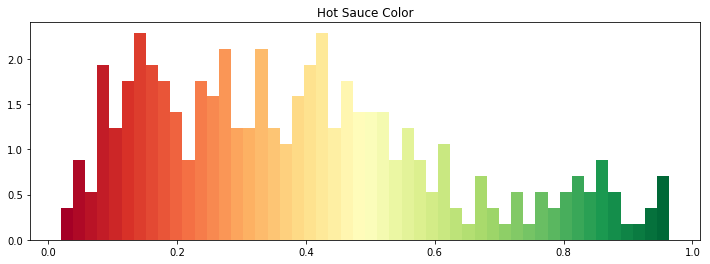

In [11]:
fig, ax = plt.subplots(figsize=(12, 4))

n, bins, patches = ax.hist(color, bins=50, density=True, color='green')
hist_set_colormap(bins, patches, cm.RdYlGn)
ax.set_title("Hot Sauce Color")